In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#Required by Jupyter for inlining images
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/TDI_BLM_inj_B1.txt',sep=' ', header=None)
data.columns = ['Time Stamp','Reading 1','Reading 2', 'Reading 3']

In [4]:
print(data.head())

     Time Stamp     Reading 1     Reading 2     Reading 3
0  1.534476e+09  2.983000e-07  7.208000e-07  4.088000e-07
1  1.534476e+09  2.872000e-07  6.684000e-07  4.143000e-07
2  1.534476e+09  3.148000e-07  6.822000e-07  4.115000e-07
3  1.534476e+09  2.569000e-07  7.264000e-07  3.922000e-07
4  1.534476e+09  2.707000e-07  6.684000e-07  3.894000e-07


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18978 entries, 0 to 18977
Data columns (total 4 columns):
Time Stamp    18978 non-null float64
Reading 1     18978 non-null float64
Reading 2     18978 non-null float64
Reading 3     18978 non-null float64
dtypes: float64(4)
memory usage: 593.1 KB


In [9]:
data['Sum'] = data['Reading 1'] + data['Reading 2'] + data['Reading 3']

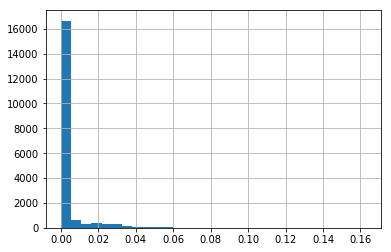

In [10]:
data['Sum'].hist(bins=30)

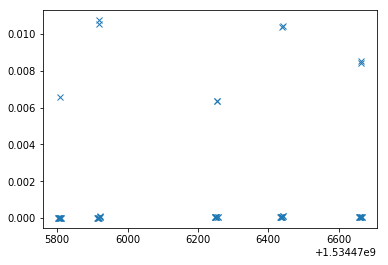

In [16]:
sample = data[:50]
plt.plot(sample['Time Stamp'],sample['Sum'],'x')
#As can be seen from this plot, every time theres
#an injection at a cetain point there is a spike in
#the reading of the BLM

In [27]:
print(pd.to_datetime(data['Time Stamp'],unit='s').head(20))

0    2018-08-17 03:16:41.707000017
1    2018-08-17 03:16:42.776000023
2    2018-08-17 03:16:43.851999998
3    2018-08-17 03:16:44.829999924
4    2018-08-17 03:16:45.772000074
5    2018-08-17 03:16:46.821000099
6    2018-08-17 03:16:47.769999981
7    2018-08-17 03:16:48.891000032
8    2018-08-17 03:16:49.845999956
9    2018-08-17 03:16:50.786999941
10   2018-08-17 03:18:33.763000011
11   2018-08-17 03:18:34.767999649
12   2018-08-17 03:18:35.773999929
13   2018-08-17 03:18:36.769000053
14   2018-08-17 03:18:37.785000086
15   2018-08-17 03:18:38.865000010
16   2018-08-17 03:18:39.769999981
17   2018-08-17 03:18:40.799999952
18   2018-08-17 03:18:41.756000042
19   2018-08-17 03:18:42.854000092
Name: Time Stamp, dtype: datetime64[ns]


TypeError: cannot convert the series to <class 'int'>